<div align="center">

# DDos Traffic Analysis for Network Security

**Subject: DATA 607: Statistical and Machine Learning**

**Gulshan Laskar, Sai Krishnam Raju Pusapati, Lalith Nandakumar, Navyasri Chinthapatla**

</div>

## 1. Introduction

In the modern digital era, the exponential growth of internet usage has brought about significant advancements in technology and communication. However, this growth has also led to an increase in cyber threats, with Distributed Denial of Service (DDoS) attacks being one of the most prevalent and disruptive forms of cyberattacks. These attacks overwhelm targeted systems, rendering them inaccessible to legitimate users and causing substantial financial and reputational damage to organizations. Detecting and mitigating DDoS attacks has become a critical challenge for cybersecurity professionals, necessitating the development of robust and efficient detection mechanisms.

This project focuses on analyzing network traffic data to identify patterns and anomalies indicative of DDoS attacks. By leveraging statistical techniques and machine learning models, the aim is to build a reliable system capable of distinguishing between normal and malicious traffic. The project involves preprocessing raw data, performing dimensionality reduction using techniques like Principal Component Analysis (PCA), and applying predictive models to classify traffic effectively.

## 2. Objective

The primary objective of this project is to develop a data-driven approach for detecting DDoS attacks in network traffic. This involves the following key goals:

Data Analysis and Preprocessing: To explore and preprocess network traffic data, ensuring it is clean, consistent, and suitable for analysis.
Dimensionality Reduction: To apply techniques like PCA to reduce the complexity of the dataset while retaining essential features for accurate classification.
Model Development: To train and evaluate machine learning models capable of distinguishing between normal and malicious traffic with high accuracy.
Performance Evaluation: To assess the effectiveness of the developed models using appropriate metrics and validate their robustness in detecting DDoS attacks.
By achieving these objectives, the project aims to contribute to the development of efficient and scalable solutions for mitigating the impact of DDoS attacks in real-world scenarios.

## 3. Dataset

In [40]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score 
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

In [9]:
df = pd.read_csv(r"C:\Users\india\Downloads\final_dataset.csv")
df.head(10)

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
5,629,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,138,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
6,630,192.168.4.118-203.73.24.75-4507-80-6,192.168.4.118,4507,203.73.24.75,80,6,12/06/2010 08:34:37 AM,469596,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
7,631,192.168.4.118-203.73.24.75-4507-80-6,192.168.4.118,4507,203.73.24.75,80,6,12/06/2010 08:34:37 AM,1978,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
8,632,192.168.4.118-203.73.24.75-4508-80-6,192.168.4.118,4508,203.73.24.75,80,6,12/06/2010 08:34:37 AM,468629,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
9,633,192.168.4.118-203.73.24.75-4508-80-6,192.168.4.118,4508,203.73.24.75,80,6,12/06/2010 08:34:38 AM,102,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [11]:
df.shape

(12794627, 85)

This dataset consists of **12,794,627** entries and **85** columns. It contains network flow data with various characteristics, such as packet size, flow duration, and protocol type. The dataset is useful for network traffic analysis, anomaly detection, and cybersecurity research.

Below is a brief explanation of some key columns in the dataset:

- **Flow ID (`object`)**: A unique identifier for each network flow.
- **Src IP (`object`)**: The source IP address from which the traffic originates.
- **Src Port (`int64`)**: The port number of the source machine.
- **Dst IP (`object`)**: The destination IP address to which the traffic is sent.
- **Dst Port (`int64`)**: The port number of the destination machine.
- **Protocol (`int64`)**: The protocol used (e.g., TCP, UDP, ICMP).
- **Timestamp (`object`)**: The time when the flow was recorded.
- **Flow Duration (`int64`)**: The duration of the network flow in microseconds.
- **Tot Fwd Pkts (`int64`)**: The total number of packets sent in the forward direction.
- **Tot Bwd Pkts (`int64`)**: The total number of packets sent in the backward direction.
- **TotLen Fwd Pkts (`float64`)**: The total size of packets sent forward in bytes.
- **TotLen Bwd Pkts (`float64`)**: The total size of packets sent backward in bytes.
- **Fwd Pkt Len Max (`float64`)**: The maximum packet length in the forward direction.
- **Bwd Pkt Len Max (`float64`)**: The maximum packet length in the backward direction.
- **Flow Byts/s (`float64`)**: The number of bytes per second in the flow.
- **Flow Pkts/s (`float64`)**: The number of packets per second in the flow.
- **Fwd IAT Mean (`float64`)**: The mean time between forward packets.
- **Bwd IAT Mean (`float64`)**: The mean time between backward packets.
- **Fwd PSH Flags (`int64`)**: The count of PSH flags in the forward direction.
- **Bwd PSH Flags (`int64`)**: The count of PSH flags in the backward direction.
- **Fwd Header Len (`int64`)**: The total size of the headers in the forward direction.
- **Bwd Header Len (`int64`)**: The total size of the headers in the backward direction.
- **Pkt Len Min (`float64`)**: The minimum packet length in the flow.
- **Pkt Len Max (`float64`)**: The maximum packet length in the flow.
- **Pkt Len Mean (`float64`)**: The average packet length in the flow.
- **Pkt Len Std (`float64`)**: The standard deviation of packet lengths in the flow.
- **SYN Flag Cnt (`int64`)**: The number of times the SYN flag was set in the flow.
- **RST Flag Cnt (`int64`)**: The number of times the RST flag was set in the flow.
- **ACK Flag Cnt (`int64`)**: The number of times the ACK flag was set in the flow.
- **Down/Up Ratio (`float64`)**: The ratio of downstream to upstream packets.
- **Init Fwd Win Byts (`int64`)**: The initial window size in bytes for the forward direction.
- **Init Bwd Win Byts (`int64`)**: The initial window size in bytes for the backward direction.
- **Idle Mean (`float64`)**: The mean idle time between packets in the flow.
- **Idle Std (`float64`)**: The standard deviation of idle times in the flow.
- **Label (`object`)**: The classification of the network flow (e.g., `Benign`, `DDoS`).

This dataset is large and provides extensive information for analyzing network activity patterns and detecting anomalies.

In [12]:
df.isna().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Mean     0
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Length: 85, dtype: int64

In [13]:
df.duplicated().sum()

0

- **No Missing Values**: The dataset does not contain any null or missing values.
- **No Duplicates**: Each entry in the dataset is unique, ensuring data integrity and consistency.

## 4. Research Question

<b> How can network traffic data be effectively analyzed and modeled to detect Distributed Denial of Service (DDoS) attacks with high accuracy, while minimizing false positives and computational overhead? </b>

This research question highlights the focus of the project on leveraging data analysis and machine learning techniques to address the challenge of DDoS attack detection. It emphasizes the need for accuracy, efficiency, and practicality in the proposed solution. It guides the project toward building a robust, data-driven detection mechanism that balances these competing priorities. By addressing this question, the project aims to contribute to the development of practical solutions for mitigating the impact of DDoS attacks in real-world environments.

To achieve the final goal, the project follows the below path:

- Exploratory Data Analysis: Analyzing the Network Traffic.

- Dimensionality Reduction: Reduce the features while retaining the most important information from dataset.

- Machine Learning Models: Predicting DDos Attacks.

- Reverse Engineering: Isolation Forest Model (Unsupervised Learning Technique).

- Evaluating Machine Learning Models.

## 5. EDA

### **Label Distribution: Understanding Traffic Composition**

#### Guiding Question 1:*"What is the distribution of normal and malicious traffic in the dataset?"*

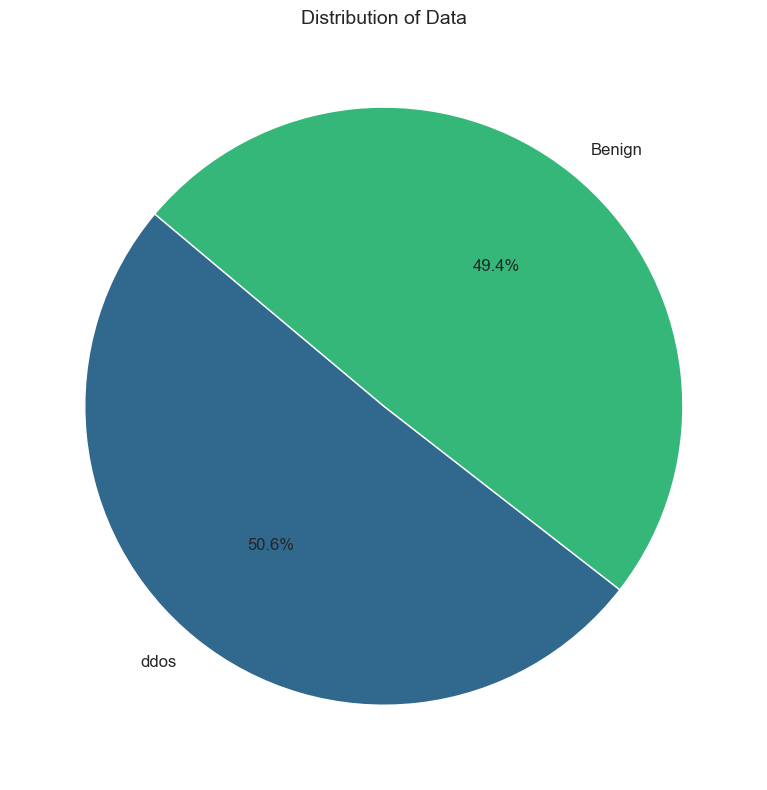

In [14]:
# Set seaborn style
sns.set_style("whitegrid")

# Calculate class distribution percentages
class_distribution = df['Label'].value_counts(normalize=True) * 100

# Use a vibrant color palette (e.g., 'bright', 'tab10', 'viridis')
colors = sns.color_palette("viridis", len(class_distribution))

# Create a pie chart with labels and percentages
plt.figure(figsize=(8, 8))
plt.pie(
    class_distribution, 
    labels=class_distribution.index,  # Show category labels
    autopct=lambda p: f'{p:.1f}%',  # Show percentage with 1 decimal place
    colors=colors, 
    startangle=140, 
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 12}  # Adjust text size
)

# Add title
plt.title('Distribution of Data', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

#### **Analysis**:

To gain insights into the composition of network traffic in the dataset, a **label distribution analysis** was conducted. The dataset consists of two primary categories:  
- **Benign traffic (Normal)**  
- **DDoS traffic (Malicious)** 

The distribution of these labels is relatively balanced but slightly skewed towards **DDoS** attacks.  

- **DDoS (50.59%)**: Represents more than half of the dataset, indicating a significant presence of attack traffic. This suggests that the dataset is heavily focused on detecting and analyzing denial-of-service attacks.  
- **Benign (49.41%)**: Accounts for nearly half of the dataset, representing normal, non-malicious network traffic.  

#### **Key Observations:**  
1. The dataset does not suffer from extreme class imbalance, making it suitable for classification without needing significant resampling techniques such as oversampling or undersampling.  
2. The slight dominance of **DDoS traffic** suggests that real-world datasets might be skewed toward attack scenarios, possibly due to the way the data was collected.  
3. This distribution ensures that a classification model trained on this dataset will have exposure to both normal and attack traffic, helping it generalize better.  

--------

### **Flow Duration vs. Packet Counts: Identifying Attack Patterns**

#### Guiding Question 2:*"How do Flow Duration and Total Forward Packets differ between DDoS and Benign traffic, and what patterns can be observed?"*  

C:\Users\india\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


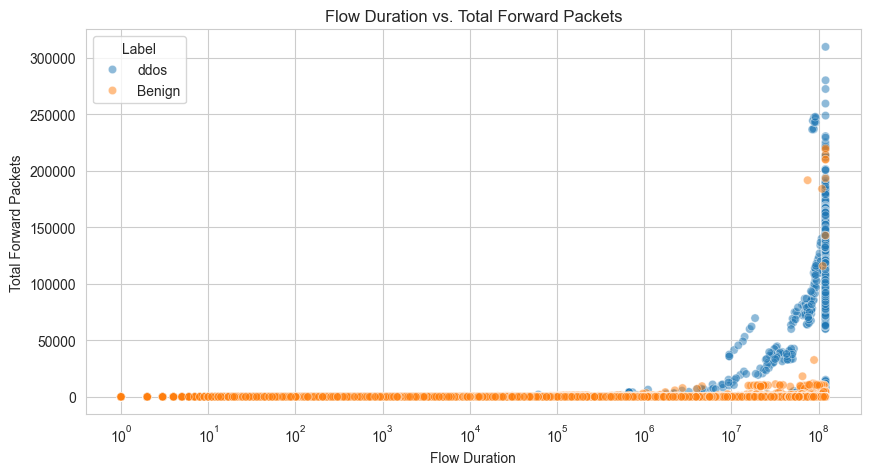

In [15]:
# 3. Flow Duration vs. Packet Counts
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Flow Duration', y='Tot Fwd Pkts', hue='Label', alpha=0.5)
plt.xscale('log')  # Log scale for better visualization
plt.title('Flow Duration vs. Total Forward Packets')
plt.xlabel('Flow Duration')
plt.ylabel('Total Forward Packets')
plt.show()

#### **Analysis:**  
To further analyze the characteristics of network traffic, a **scatter plot** was generated to examine the relationship between **Flow Duration** and **Total Forward Packets**, with data points color-coded based on the traffic label (**Benign or DDoS**). The **log scale** was applied to the X-axis (Flow Duration) to improve visualization and highlight differences more effectively.  

#### **Key Observations:**  

##### **a) DDoS vs. Benign Traffic Differences**  

- **DDoS Traffic (Blue Points)**:  
  - Appears **highly concentrated** on the **right side** of the plot, indicating **high Flow Duration** values.  
  - Many DDoS flows exhibit **significantly higher Total Forward Packets** than benign traffic.  
  - This suggests that **DDoS attacks generate prolonged, high-volume traffic**, which is a key characteristic of **network flooding attacks**.  

- **Benign Traffic (Orange Points)**:  
  - Mostly **clustered at the bottom** of the plot, indicating **low Total Forward Packets**.  
  - Spread across different Flow Duration values but **do not exhibit high packet counts** like DDoS traffic.  
  - This pattern reflects **normal network behavior**, where packet flows are typically **controlled and stable**.  

##### **b) Log-Scale Effect on Flow Duration**  

- The **X-axis (Flow Duration) is presented on a log scale**, meaning:  
  - **Smaller values** on the left represent **short-duration** network flows.  
  - **Larger values** on the right represent **long-duration** network flows.  
- This scaling **enhances visibility**, revealing that many **DDoS packets persist over an extended time**, reinforcing the idea of **long-lasting attack traffic** aimed at overwhelming the network.  

##### **c) Patterns Indicating Attack Behavior**  

- **DDoS attacks** generate a **significantly higher number of packets over time**, whereas **benign flows remain stable and controlled**.  
- The **scatter plot effectively separates attack traffic from normal traffic**, reinforcing the idea that **Flow Duration and Total Forward Packets are strong indicators for detecting DDoS attacks**.  
- This insight is valuable for **developing automated intrusion detection models**, as these features can help distinguish between malicious and benign traffic patterns.  

---------

In [17]:
df['Protocol'].value_counts()

Protocol
6     10489144
17     2189941
0       115542
Name: count, dtype: int64

C:\Users\india\AppData\Local\Temp\ipykernel_6332\2478731153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Protocol_Name'], order=df['Protocol_Name'].value_counts().index, palette='viridis')


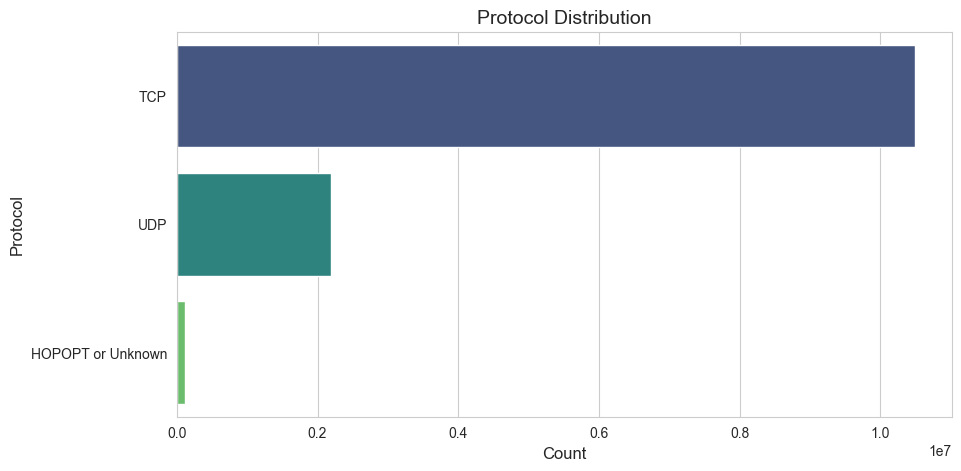

In [18]:
# 4. Protocol Distribution
# Mapping protocol numbers to their actual names
protocol_mapping = {6: 'TCP', 17: 'UDP', 0: 'HOPOPT or Unknown'}
df['Protocol_Name'] = df['Protocol'].map(protocol_mapping)  # Replace numbers with names

# Plotting
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Protocol_Name'], order=df['Protocol_Name'].value_counts().index, palette='viridis')

# Labels and title
plt.title('Protocol Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Protocol', fontsize=12)
plt.show()

#### **Significance of This Analysis**

1. TCP (Protocol 6) - ((Transmission Control Protocol)) Dominance
- Most traffic in the dataset is TCP-based (10M+ flows).
- Indicates reliable, connection-oriented traffic (e.g., web browsing, SSH, FTP, etc.).
- If a DDoS attack is TCP-based, it might use techniques like SYN Floods.
  
2. UDP (Protocol 17)- ((User Datagram Protocol)) in Second Place
- UDP is the second most used protocol (~2.1M flows).
- Often associated with DNS amplification attacks, UDP floods, and gaming traffic.
- Important to analyze UDP-based DDoS attacks.
  
3. Presence of Protocol 0 (Unknown or Hop-by-Hop Option)
- Only 115K flows (very rare).
- Can indicate malformed packets, misconfigured traffic, or network scanning attempts.
- Worth investigating if these packets are part of an attack or just noise.

#### **Distribution of protocols in Benign Vs DDOS**

In [19]:
# Map protocol numbers to names
protocol_mapping = {6: 'TCP', 17: 'UDP', 0: 'HOPOPT'}
df['Protocol_Name'] = df['Protocol'].map(protocol_mapping)

# Count occurrences of each protocol in benign vs. ddos traffic
attack_distribution = df.groupby(['Label', 'Protocol_Name']).size().unstack().fillna(0)

# Display result
print(attack_distribution)

# Optional: Normalize to see percentages instead of raw counts
attack_distribution_percent = attack_distribution.div(attack_distribution.sum(axis=1), axis=0) * 100
print(attack_distribution_percent)

Protocol_Name    HOPOPT        TCP        UDP
Label                                        
Benign         115542.0  4020622.0  2185816.0
ddos                0.0  6468522.0     4125.0
Protocol_Name    HOPOPT        TCP        UDP
Label                                        
Benign         1.827624  63.597512  34.574864
ddos           0.000000  99.936270   0.063730


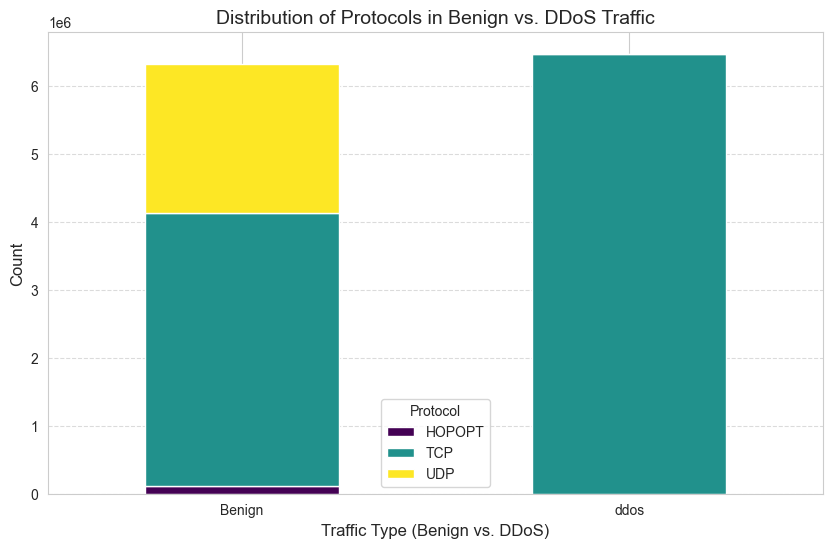

In [20]:
# Group by Label and Protocol
attack_distribution = df.groupby(['Label', 'Protocol_Name']).size().unstack().fillna(0)

# Plot
attack_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Labels and Title
plt.title('Distribution of Protocols in Benign vs. DDoS Traffic', fontsize=14)
plt.xlabel('Traffic Type (Benign vs. DDoS)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Protocol', fontsize=10)
plt.xticks(rotation=0)  # Keep labels readable
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

#### **Observations:**  
- The **sharp contrast** between **benign** and **DDoS traffic** suggests that attackers are **exploiting TCP vulnerabilities** rather than UDP.  
- **4.3.5 Possible Explanation:**  
  - The attack may be targeting **web servers or databases**, which primarily rely on TCP connections.  
  - UDP-based amplification techniques may have been **blocked or mitigated** by **network security defenses**.  

#### **Implications for Network Defense Strategies:**  
- **Focus on TCP-based attack mitigation:**  
  - Implement **SYN flood protection** (e.g., SYN cookies, rate limiting).  
  - Monitor **TCP connection patterns** to detect anomalies.  
  - Use **deep packet inspection** to distinguish between normal and attack traffic.  
- **Investigate the absence of UDP-based attacks:**  
  - Evaluate whether **firewall policies or ISP-level protections** are filtering out UDP floods.  
  - Consider potential **future shifts in attack patterns** where attackers may explore UDP-based strategies.  

#### **Conclusion:**  
The findings reveal that **TCP is the primary attack vector** in this dataset, while **UDP plays a minor role in DDoS activity**. This suggests that **attackers are leveraging TCP weaknesses to overwhelm target systems**, necessitating **robust TCP-based defense mechanisms**.  

------

### **Temporal Analysis of Network Attacks: Identifying Attack Patterns Over Time**

Distributed Denial-of-Service (DDoS) attacks are one of the most prevalent and damaging forms of cyberattacks, causing service disruptions by overwhelming networks with malicious traffic. Identifying patterns in the timing of these attacks is crucial for enhancing the security infrastructure of networks and improving mitigation strategies. This analysis aims to identify when DDoS attacks occur most frequently by examining the distribution of malicious traffic over a 24-hour period, broken down into 6-hour intervals. This temporal analysis provides insights into potential attack strategies and highlights vulnerable time windows during the day.

#### Guiding Question 4:*"At what time of the day do DDoS attacks occur most frequently, and what insights can be drawn from their distribution over 6-hour intervals?"*

#### **Methodology**

To answer this question, we performed the following steps:

1. **Extracting Hour of the Day**: We extracted the hour of the day from the timestamp of each data entry.
2. **Defining Time Intervals**: We divided the 24-hour day into four 6-hour intervals: 
    - 12 AM - 6 AM
    - 6 AM - 12 PM
    - 12 PM - 6 PM
    - 6 PM - 12 AM
3. **Labeling and Grouping Data**: Each timestamp was assigned to one of these time intervals, and attacks were filtered by excluding benign traffic.
4. **Counting Attacks**: We then counted the number of DDoS attacks in each time interval, focusing only on entries labeled as "malicious."
5. **Visualization**: The frequency of DDoS attacks in each time interval was plotted using a bar chart.

In [21]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')

C:\Users\india\AppData\Local\Temp\ipykernel_6332\1148330935.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attack_counts = df[df['Label'] != 'BENIGN'].groupby('Hour_Bin').size()
C:\Users\india\AppData\Local\Temp\ipykernel_6332\1148330935.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.index, y=attack_counts.values, palette='Reds')


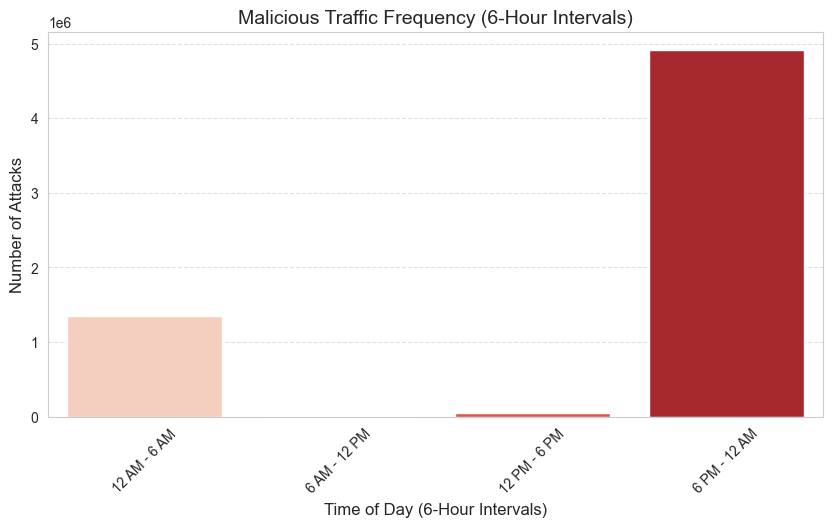

In [22]:
# Extract the hour of the day
df['Hour'] = df['Timestamp'].dt.hour

# Define 6-hour interval bins
hour_bins = [0, 6, 12, 18, 24]  # 0-6, 6-12, 12-18, 18-24
hour_labels = ['12 AM - 6 AM', '6 AM - 12 PM', '12 PM - 6 PM', '6 PM - 12 AM']

# Create a new column for 6-hour time ranges
df['Hour_Bin'] = pd.cut(df['Hour'], bins=hour_bins, labels=hour_labels, right=False)

# Count attacks in each 6-hour time range
attack_counts = df[df['Label'] != 'BENIGN'].groupby('Hour_Bin').size()

# Plot the attack frequency in 6-hour intervals
plt.figure(figsize=(10, 5))
sns.barplot(x=attack_counts.index, y=attack_counts.values, palette='Reds')

# Formatting the plot
plt.title("Malicious Traffic Frequency (6-Hour Intervals)", fontsize=14)
plt.xlabel("Time of Day (6-Hour Intervals)", fontsize=12)
plt.ylabel("Number of Attacks", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.show()

#### **Observations**

The bar chart generated in this analysis shows the frequency of DDoS attacks across four 6-hour time intervals. The following insights were observed:

- **Peak Attacks in the Evening (6 PM - 12 AM)**:  
  The highest number of DDoS attacks occurred during the late evening, specifically between 6 PM and 12 AM. This period recorded over **5 million attacks**, making it the most vulnerable time window for networks.

- **Significant Attacks in the Early Morning (12 AM - 6 AM)**:  
  A noticeable volume of attacks was also observed during the early morning hours (12 AM - 6 AM), although the numbers were not as high as the late evening period. This suggests that attackers might be exploiting off-peak hours when human oversight and active monitoring are minimal.

- **Low Attack Frequency During Daylight Hours (6 AM - 12 PM and 12 PM - 6 PM)**:  
  The morning and afternoon hours saw very few incidents of DDoS attacks. This suggests that attackers may avoid the daytime hours, possibly due to heightened network monitoring and security response during these periods.

#### **Summary of Attack Distribution**

- **12 AM - 6 AM**: Significant attack activity, though lower than the peak evening period.
- **6 AM - 12 PM**: Negligible attack frequency.
- **12 PM - 6 PM**: Almost no attacks detected.
- **6 PM - 12 AM**: The highest concentration of attacks, with over 5 million incidents.

The results highlight the strategic behavior of attackers, suggesting that the late evening and early morning hours are preferred for executing DDoS attacks, possibly due to decreased network monitoring and human oversight.

---------

## 6. Data Preprocessing

In large datasets, processing the entire dataset can be computationally expensive and time-consuming, especially during model prototyping. To address this, a random sample of the data is taken to reduce the size while retaining the overall distribution and characteristics of the dataset. This allows for faster experimentation and analysis without compromising the representativeness of the data.

In [3]:
# Take a random sample of the dataset (let's say 5% of the total rows)
sample_data = df.sample(frac=0.05, random_state=42)
print(sample_data.shape)

Sampled_data = sample_data.to_csv(r"C:\Users\india\Desktop\607 stats\Project\Sampled_data.csv", index=False)

(639731, 85)


- The sample method is used to randomly select 5% of the rows from the dataset (df).

- The frac=0.05 parameter specifies that 5% of the total rows should be sampled.

- The random_state=42 ensures reproducibility, meaning the same random sample will be selected each time the code is run.

In [41]:
data=pd.read_csv("Sampled_data.csv")

# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

def parse_ip(ip_value):
    # Convert "172.31.69.25" to "172316925" by removing dots
    try:
        return int(ip_value.replace('.', ''))
    except ValueError:
        return ip_value

for col in ['Src IP', 'Dst IP']:
    data[col] = data[col].apply(parse_ip)

data

C:\Users\india\AppData\Local\Temp\ipykernel_6332\856947200.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')


,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,2125572,172.31.69.25-18.219.193.20-80-52082-6,172316925,80,1821919320,52082,6,2018-02-16 23:17:23,4129902,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,5938079,172.31.69.9-209.85.202.157-51823-443-6,17231699,51823,20985202157,443,6,2018-02-20 12:47:31,552924,9,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,362501,172.31.69.28-18.216.24.42-80-55635-6,182162442,55635,172316928,80,6,2018-02-21 23:49:26,18489,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,3027082,172.31.69.25-18.219.193.20-80-47546-6,172316925,80,1821919320,47546,6,2018-02-16 23:23:56,4339629,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,195344,172.31.69.25-18.219.193.20-80-41424-6,1821919320,41424,172316925,80,6,2018-02-16 23:15:59,31671,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639726,2958974,172.31.69.25-18.219.193.20-80-53888-6,172316925,80,1821919320,53888,6,2018-02-16 23:23:26,4544362,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
639727,2740700,172.31.0.2-172.31.65.109-53-57281-17,1723165109,57281,1723102,53,17,2018-02-20 09:50:39,1039,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
639728,1838456,172.31.69.28-18.216.200.189-80-62346-6,172316928,80,18216200189,62346,6,2018-02-22 00:14:41,1266,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
639729,1549493,172.31.69.28-18.219.32.43-80-52174-6,172316928,80,182193243,52174,6,2018-02-22 00:00:44,32896,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


**Parsing and Transformation:**

- The above block of code Converts the Timestamp column to a proper datetime format for time-based analysis.

- Parses IP addresses in the Src IP (Source IP) and Dst IP (Destination IP) columns by removing dots and converting them into integers, making them easier to process numerically.

In [42]:
data['Label'].value_counts()

Label
ddos      323612
Benign    316119
Name: count, dtype: int64

In [43]:
data.isna().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Mean     0
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Length: 85, dtype: int64

### Feature Selection:

- The drop method removes the columns Label, Flow ID, and Timestamp from the dataset:
    - Label: This is the target variable (dependent variable) and is stored separately in y.
    - Flow ID and Timestamp: These columns are not numeric or are not relevant for model training, so they are excluded.

- The remaining columns in X_numeric are the numeric features used as input for the machine learning model.

### Target Variable:

- The Label column, which contains the class labels (e.g., Benign or DDoS), is stored in y.

- This is the variable the model will learn to predict.

In [44]:
#last column is the target variable
X_numeric = data.drop(columns=['Label','Flow ID','Timestamp'])  # Exclude non-numeric columns
y = data['Label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (511784, 82)
Testing set shape: (127947, 82)


### Train-Test Split:

- The train_test_split function from sklearn.model_selection splits the dataset into training and testing sets:
    - X_train and y_train: Used to train the machine learning model (80% of the data).
    - X_test and y_test: Used to evaluate the model's performance on unseen data (20% of the data).

- The test_size=0.2 parameter specifies that 20% of the data should be allocated to the testing set.

- The random_state=42 ensures reproducibility, meaning the same split will be generated each time the code is run.

### Handling Infinite Values:

- The replace method is used to replace any occurrences of positive infinity (np.inf) or negative infinity (-np.inf) in the training (X_train) and testing (X_test) datasets with NaN.

- Infinite values can arise due to division by zero or other numerical operations and can cause issues during model training or scaling.

- By replacing them with NaN, these problematic values can be handled appropriately (e.g., imputed or ignored).

### Feature Scaling:

- The StandardScaler from sklearn.preprocessing is used to standardize the numeric features in the dataset.

- fit_transform on X_train:
    - The fit_transform method calculates the mean and standard deviation of each feature in the training set (X_train) and scales the data accordingly.
    - Each feature is transformed to have a mean of 0 and a standard deviation of 1.

- transform on X_test:
    - The transform method applies the scaling parameters (mean and standard deviation) learned from the training set to the testing set (X_test).
    - This ensures that the testing data is scaled consistently with the training data.

In [45]:

# Replace infinities with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Checking for Missing Values in the Original Dataset

- Purpose: To identify if there are any missing values in the original dataset (data) and calculate their percentage.

- Steps:
    - data.isnull().sum(): Counts the total number of missing values in each column.
    - missing_percent: Calculates the percentage of missing values for each column relative to the total number of rows.
    - Prints the columns with missing values and their percentages (if any).

### Checking for Missing Values in Scaled Data

- Purpose: To ensure that the scaled training (X_train_scaled) and testing (X_test_scaled) datasets do not contain any missing values (NaN).

- Steps:
    - np.isnan(X_train_scaled).sum(): Counts the total number of NaN values in the scaled training data.
    - np.isnan(X_test_scaled).sum(): Counts the total number of NaN values in the scaled testing data.
    - Calculates the percentage of missing values in both datasets to assess the extent of the issue.

### Handling Missing Values in Scaled Data

- Purpose: To clean the scaled data by removing rows with missing values instead of imputing them.

- Steps:
    - Checks if there are any missing values in X_train_scaled or X_test_scaled.
    - If missing values are found:
        - Identifies valid rows (rows without NaN values) using ~np.isnan(...).any(axis=1).
        - Filters the scaled datasets (X_train_scaled and X_test_scaled) to keep only valid rows.
        - Updates the corresponding target variables (y_train and y_test) to match the cleaned feature datasets.
    - Prints the new shapes of the cleaned datasets and verifies that no missing values remain.

In [46]:
# Check for missing values in the original dataframe
print("\nMissing values in original dataframe:")
print(data.isnull().sum())

# Calculate percentage of missing values in original dataframe
missing_percent = data.isnull().sum() * 100 / len(data)
print("\nPercentage of missing values in original dataframe:")
print(missing_percent[missing_percent > 0])

# Check for missing values in scaled data
print("\nMissing values in X_train_scaled:")
print(f"Total NaN values: {np.isnan(X_train_scaled).sum()}")
print(f"Percentage of NaN values: {np.isnan(X_train_scaled).sum() * 100 / X_train_scaled.size:.4f}%")

print("\nMissing values in X_test_scaled:")
print(f"Total NaN values: {np.isnan(X_test_scaled).sum()}")
print(f"Percentage of NaN values: {np.isnan(X_test_scaled).sum() * 100 / X_test_scaled.size:.4f}%")

# Drop rows with missing values instead of imputing with mean
if np.isnan(X_train_scaled).sum() > 0 or np.isnan(X_test_scaled).sum() > 0:
    print("\nDropping rows with missing values in scaled data...")
    
    # Get indices of rows without NaN values
    train_valid_idx = ~np.isnan(X_train_scaled).any(axis=1)
    test_valid_idx = ~np.isnan(X_test_scaled).any(axis=1)
    
    # Keep only valid rows
    X_train_scaled = X_train_scaled[train_valid_idx]
    y_train = y_train.iloc[train_valid_idx]
    X_test_scaled = X_test_scaled[test_valid_idx]
    y_test = y_test.iloc[test_valid_idx]
    
    print(f"X_train_scaled shape after dropping missing values: {X_train_scaled.shape}")
    print(f"X_test_scaled shape after dropping missing values: {X_test_scaled.shape}")
    
    # Verify no missing values remain
    print(f"Missing values after dropping in X_train_scaled: {np.isnan(X_train_scaled).sum()}")
    print(f"Missing values after dropping in X_test_scaled: {np.isnan(X_test_scaled).sum()}")


Missing values in original dataframe:
Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Mean     0
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Length: 85, dtype: int64

Percentage of missing values in original dataframe:
Flow Byts/s    0.218529
dtype: float64

Missing values in X_train_scaled:
Total NaN values: 3708
Percentage of NaN values: 0.0088%

Missing values in X_test_scaled:
Total NaN values: 922
Percentage of NaN values: 0.0088%

Dropping rows with missing values in scaled data...
X_train_scaled shape after dropping missing values: (509930, 82)
X_test_scaled shape after dropping missing values: (127486, 82)
Missing values after dropping in X_train_scaled: 0
Missing values after dropping in X_test_scaled: 0


--------------

### **Dimensionality Reduction using PCA:** 

PCA is used to transform the original features into a smaller set of uncorrelated components while retaining most of the variance in the data. This helps:

- Reduce computational complexity.
- Remove redundant or less important features.
- Improve model performance by focusing on the most significant components.

### 1. PCA Initialization:

- A PCA object is created to analyze the variance explained by each principal component.

- The fit method is applied to the scaled training data (X_train_scaled) to compute the principal components and their explained variance.

### 2. Variance Plot:

- The cumulative explained variance ratio is plotted to visualize how much variance is retained as the number of components increases.

- The np.cumsum(pca_analysis.explained_variance_ratio_) calculates the cumulative sum of the explained variance ratio for each component.

- Horizontal lines are added at 95% and 99% explained variance to help identify the number of components needed to retain these levels of variance.

### 3. Optimal Number of Components:

- The cumulative explained variance (cumsum) is used to find the number of components required to retain 95% and 99% of the variance.

- np.argmax(cumsum >= 0.95) identifies the index of the first component where the cumulative variance reaches or exceeds 95%.

- Adding +1 adjusts for zero-based indexing to get the actual number of components.

- The same process is repeated for 99% variance.

### 4. Apply PCA with Optimal Components:

- A new PCA object is created with n_components=n_components_95, which retains 95% of the variance.

- The fit_transform method is applied to the scaled training data (X_train_scaled) to compute the principal components and transform the data into the reduced-dimensional space.
- The transform method is applied to the scaled testing data (X_test_scaled) to project it into the same reduced-dimensional space.

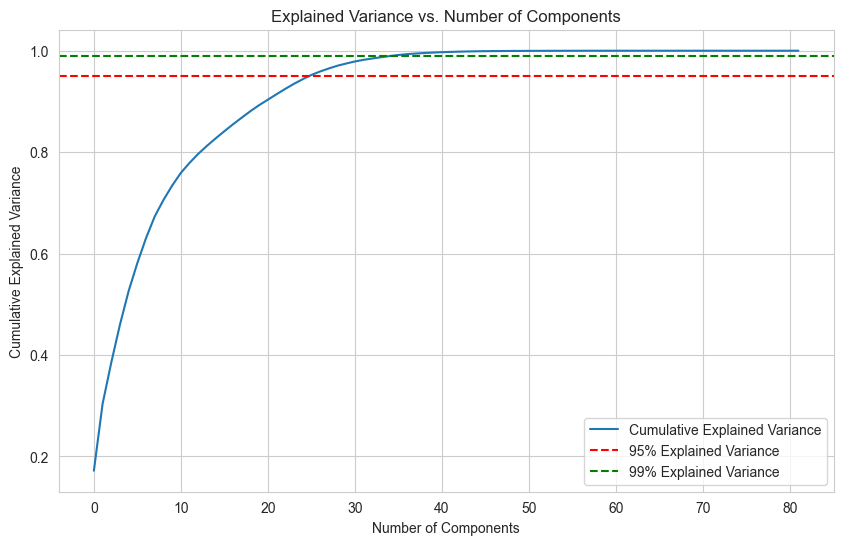

Number of components for 95% variance: 26
Number of components for 99% variance: 36
Original feature dimension: 82
Reduced feature dimension with PCA: 26


In [47]:
# Apply PCA to reduce dimensionality
# First, let's analyze how many components we should keep
pca_analysis = PCA()
pca_analysis.fit(X_train_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_analysis.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)

# Add a horizontal line at 95% explained variance
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axhline(y=0.99, color='g', linestyle='--')
plt.legend(['Cumulative Explained Variance', '95% Explained Variance', '99% Explained Variance'])
plt.show()

# Find number of components needed for 95% and 99% variance
cumsum = np.cumsum(pca_analysis.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum >= 0.95) + 1
n_components_99 = np.argmax(cumsum >= 0.99) + 1
print(f"Number of components for 95% variance: {n_components_95}")
print(f"Number of components for 99% variance: {n_components_99}")

# Apply PCA with selected number of components (using 95% variance)
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original feature dimension: {X_train_scaled.shape[1]}")
print(f"Reduced feature dimension with PCA: {X_train_pca.shape[1]}")

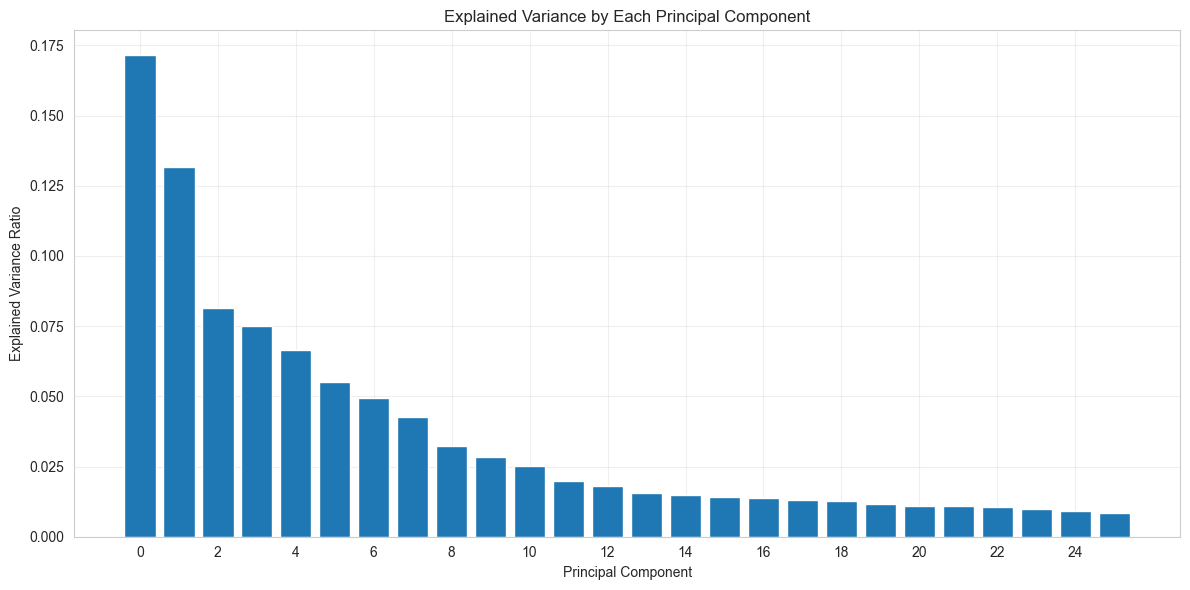

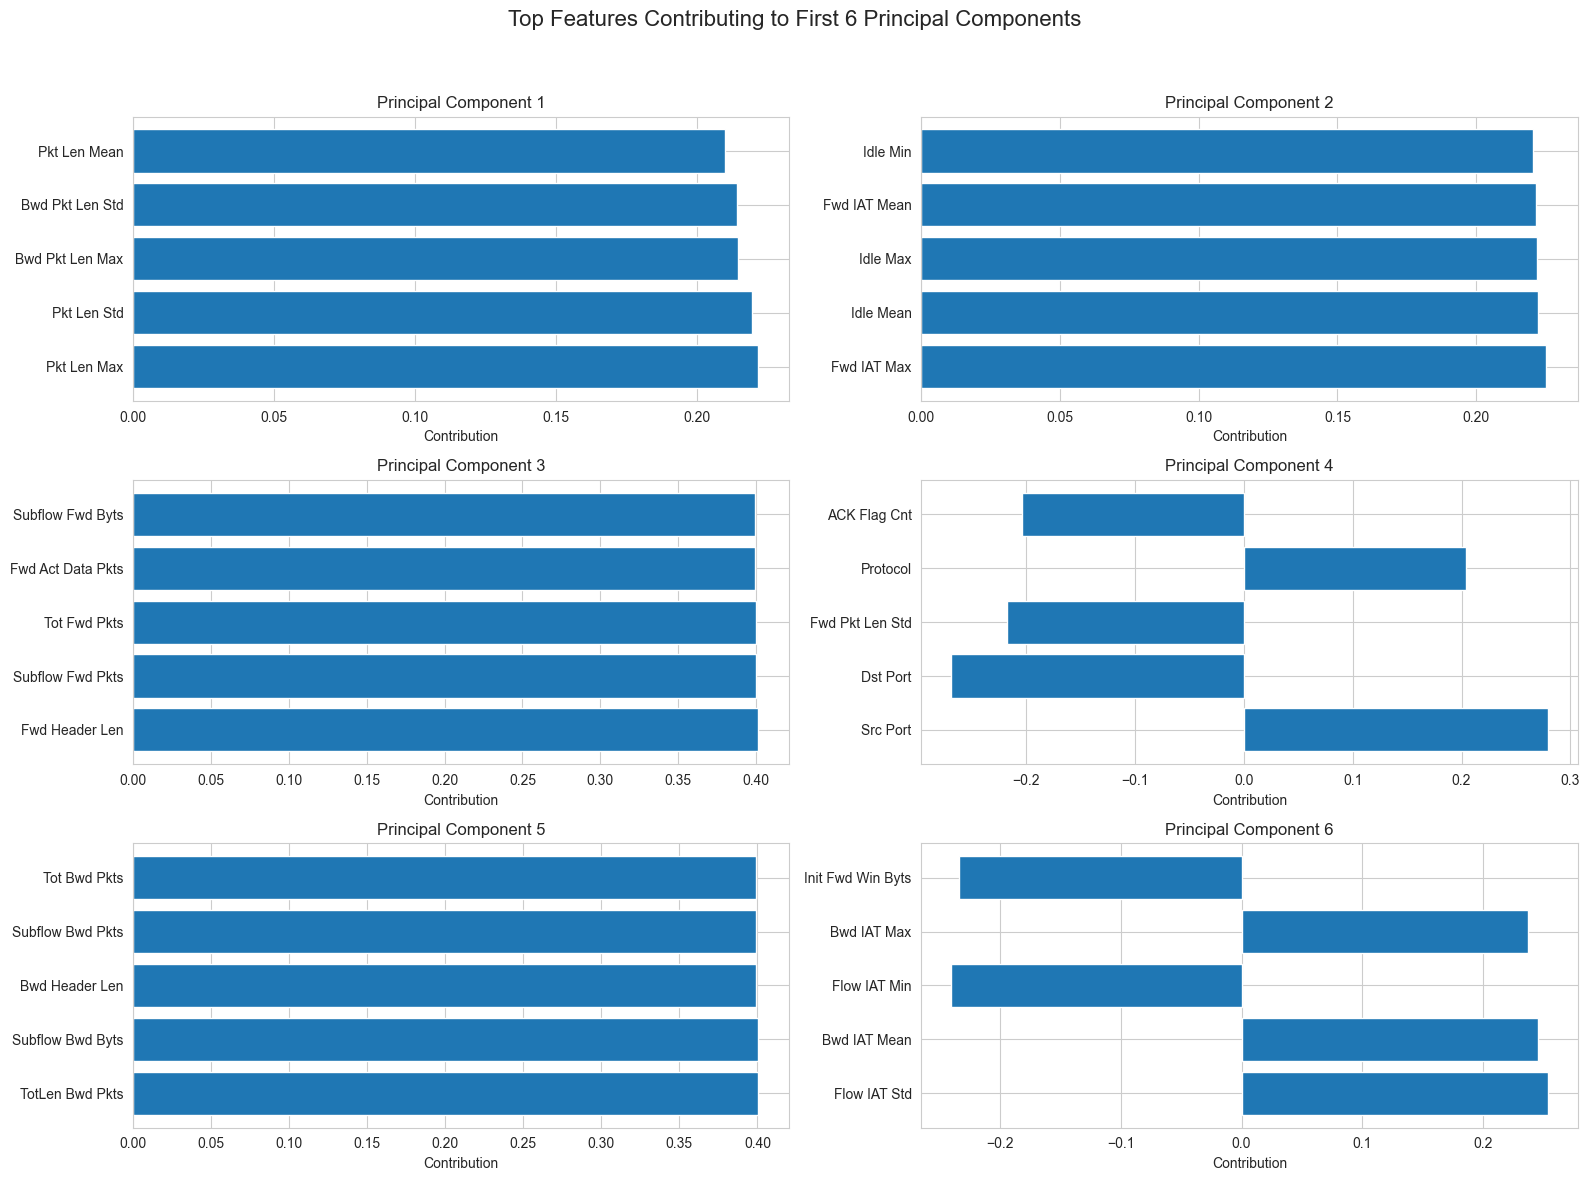

Cumulative explained variance by 26 components: 0.9522
First 5 components explain: 0.5263 of the variance


In [48]:
# Display the explained variance for each of the 26 components
plt.figure(figsize=(12, 6))
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.xticks(range(0, 26, 2))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Get the feature names from the original dataset
feature_names = X_train.columns

# Show the top contributing features for each principal component
n_top_features = 5  # Number of top features to show for each component

plt.figure(figsize=(16, 12))
for i in range(min(6, len(pca.components_))):  # Show the first 6 components
    component = pca.components_[i]
    # Get indices of top features
    indices = np.abs(component).argsort()[-n_top_features:][::-1]
    top_features = [feature_names[j] for j in indices]
    top_contributions = [component[j] for j in indices]
    
    plt.subplot(3, 2, i+1)
    plt.barh(top_features, top_contributions)
    plt.title(f'Principal Component {i+1}')
    plt.xlabel('Contribution')
    plt.tight_layout()

plt.suptitle('Top Features Contributing to First 6 Principal Components', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print the cumulative explained variance
print(f"Cumulative explained variance by 26 components: {np.sum(explained_variance):.4f}")
print(f"First 5 components explain: {np.sum(explained_variance[:5]):.4f} of the variance")

##### The explained variance plot shows that the first few components dominate in capturing the variance, making PCA an effective dimensionality reduction technique.

##### The top feature contribution plots provide interpretability, showing which features are most influential for each principal component.

##### The cumulative explained variance highlights how much information is retained, demonstrating that PCA successfully reduces dimensionality without significant information loss.

In [31]:
# Create DataFrames for the original non-scaled data
# Convert original training data to DataFrame
train_df = pd.DataFrame(X_train, columns=X_train.columns)
train_df['Label'] = y_train  # Add target variable

# Convert original test data to DataFrame
test_df = pd.DataFrame(X_test, columns=X_test.columns)
test_df['Label'] = y_test  # Add target variable

# Optionally, combine into a single DataFrame with a train/test indicator
train_df['Dataset'] = 'Train'
test_df['Dataset'] = 'Test'
combined_df = pd.concat([train_df, test_df], axis=0)

# Save the datasets to CSV files
train_df.to_csv('train_original_data.csv', index=False)
test_df.to_csv('test_original_data.csv', index=False)
combined_df.to_csv('combined_original_data.csv', index=False)

print(f"Saved non-scaled original data to CSV files:")
print(f"- Training data shape: {train_df.shape}")
print(f"- Testing data shape: {test_df.shape}")
print(f"- Combined data shape: {combined_df.shape}")

# Display first few rows of the combined dataset
combined_df.head()


Saved non-scaled original data to CSV files:
- Training data shape: (511784, 84)
- Testing data shape: (127947, 84)
- Combined data shape: (639731, 84)


,Unnamed: 0,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Dataset
205522,4085082,172316670,51952,527362170,443,6,28420134,9,11,324.0,...,64155.666667,85462.049977,162773.0,11728.0,9.408877e+06,1.229881e+06,10128654.0,7988778.0,Benign,Train
347508,135757,18219543,64769,172316925,80,6,1197772,3,4,20.0,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,ddos,Train
190356,1338413,6621217970,54393,172316643,3389,6,3552335,11,7,1148.0,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign,Train
599549,1212443,182162442,59052,172316928,80,6,2286,1,1,0.0,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,ddos,Train
453878,3109335,172316925,80,1821919320,47148,6,4540888,4,4,935.0,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,ddos,Train


### Components vs. Cumulative Variance

| **Components** | **Cumulative Variance** |
|-----------------|--------------------------|
| 5               | 52.63%                  |
| 10              | 69.81%                  |
| 15              | 82.45%                  |
| 20              | 90.12%                  |
| 26              | 95.22%                  |

## 7. Machine Learning Models

### 7.1. Logistic Regression

Logistic Regression is chosen as the initial model for this project due to its simplicity, interpretability, and effectiveness in binary classification tasks. It is a widely used algorithm that models the relationship between the input features and the probability of a binary outcome. In the context of DDoS detection, Logistic Regression predicts whether a given network traffic instance is normal or malicious. This model serves as a baseline to evaluate the performance of more complex algorithms later in the project.

Logistic Regression works by applying a logistic function (sigmoid) to a linear combination of input features. The sigmoid function maps the output to a probability value between 0 and 1, which is then used to classify the data into one of two categories. The model learns the optimal weights for the features during training by minimizing the error using a loss function, typically the log-loss.

In this case, the model is trained on the PCA-transformed training data (X_train_pca) and then tested on the PCA-transformed test data (X_test_pca). The performance of the model is evaluated using metrics such as accuracy, classification report, and confusion matrix.

In [49]:
model = LogisticRegression(random_state=42, max_iter=1000)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg', 'saga']
}

gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                     
    scoring='accuracy',       
    n_jobs=-1,              
    verbose=1
)

gs.fit(X_train_pca, y_train)

best_model = gs.best_estimator_

y_pred = best_model.predict(X_test_pca)

print("Best Parameters:", gs.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.980876331518755
Classification Report:
               precision    recall  f1-score   support

      Benign       0.99      0.97      0.98     62562
        ddos       0.97      0.99      0.98     64924

    accuracy                           0.98    127486
   macro avg       0.98      0.98      0.98    127486
weighted avg       0.98      0.98      0.98    127486

Confusion Matrix:
 [[60554  2008]
 [  430 64494]]


**Model Initialization and Hyperparameter Tuning:** The LogisticRegression model is initialized with a fixed random state (random_state=42) to ensure reproducibility. Hyperparameters: `{'C': 1.0, 'solver': 'lbfgs'}`

**Model Training:** The fit method trains the model using the PCA-transformed training data (X_train_pca) and the corresponding labels (y_train) with best hyperparameters. 

**Prediction:** The predict method generates predictions (y_pred) for the PCA-transformed test data (X_test_pca).

**Results:** 

The model achieved an accuracy of 98%, indicating that it correctly classified 98% of the test instances.

For class 0 (normal traffic), the precision is 0.99, recall is 0.97, and F1-score is 0.98. This means the model is slightly better at identifying normal traffic but occasionally misclassifies it as malicious.

For class 1 (malicious traffic), the precision is 0.97, recall is 0.99, and F1-score is 0.98. This indicates the model is effective at detecting malicious traffic with a slightly higher recall.

These results demonstrate that the Logistic Regression model performs well as a baseline, with balanced precision and recall for both classes. However, there is room for improvement, particularly in reducing false positives and false negatives. This analysis provides a foundation for exploring more advanced models to enhance detection performance.


### 7.2. Random Forest

Random Forest is a powerful ensemble learning algorithm that combines the predictions of multiple decision trees to improve classification accuracy and reduce overfitting. It is particularly effective for handling high-dimensional data and capturing complex relationships between features. In the context of DDoS detection, Random Forest is chosen for its ability to handle large datasets and provide robust predictions, even in the presence of noise or irrelevant features.

Random Forest works by constructing multiple decision trees during training and aggregating their predictions to make a final decision. Each tree is trained on a random subset of the data and features, which introduces diversity and reduces the risk of overfitting. The final prediction is made by majority voting (for classification tasks) or averaging (for regression tasks). The hyperparameters, such as the number of trees (n_estimators), maximum depth (max_depth), and minimum samples for splitting and leaf nodes, control the complexity and performance of the model.

In this case, the Random Forest model is trained on the PCA-transformed training data (X_train_pca) and evaluated on the PCA-transformed test data (X_test_pca). The performance is assessed using accuracy, classification report, and confusion matrix.

In [ ]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions using the best model
y_pred_rf = best_rf_model.predict(X_test_pca)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

In [33]:
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)
rf_model.fit(X_train_pca, y_train)

y_pred_rf = rf_model.predict(X_test_pca)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9974585444676278
Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     62562
        ddos       1.00      1.00      1.00     64924

    accuracy                           1.00    127486
   macro avg       1.00      1.00      1.00    127486
weighted avg       1.00      1.00      1.00    127486

Confusion Matrix:
 [[62319   243]
 [   81 64843]]


**Model Initialization:** The RandomForestClassifier is initialized with specific hyperparameters:

1. n_estimators=100: The number of decision trees in the forest.

2. max_depth=10: The maximum depth of each tree to prevent overfitting.

3. min_samples_split=5: The minimum number of samples required to split an internal node.

4. min_samples_leaf=2: The minimum number of samples required to be at a leaf node.

5. random_state=42: Ensures reproducibility.

**Model Training:** The fit method trains the Random Forest model using the PCA-transformed training data (X_train_pca) and corresponding labels (y_train).

**Prediction:** The predict method generates predictions (y_pred_rf) for the PCA-transformed test data (X_test_pca).

**Results:**

The Random Forest model achieved an exceptional accuracy of 99.75%, indicating that it correctly classified nearly all instances in the test dataset.

For the Benign class, the precision is 1.00, recall is 1.00, and F1-score is 1.00, showing that the model is highly effective at identifying normal traffic.

For the ddos class, the precision is 1.00, recall is 1.00, and F1-score is 1.00, demonstrating excellent performance in detecting DDoS attacks.

These results highlight the Random Forest model's outstanding performance in detecting DDoS attacks with near-perfect precision and recall. The low number of false positives and false negatives indicates that the model is both accurate and reliable. This makes Random Forest a strong candidate for real-world DDoS detection systems. However, further analysis could explore the impact of hyperparameter tuning or compare its performance with other advanced models.

### 7.3. Isolation Forest

In this project the Isolation Forest model is used to detect anomalies in network traffic. In this context, anomalies represent potential DDoS (Distributed Denial of Service) attacks, while normal (benign) traffic is labeled as non-anomalous. The main steps include:

- Preparing the Data:
The data is copied and preprocessed by mapping labels ('ddos' to 1 for anomalies, and 'Benign' to -1 for normal traffic) and cleaning up infinite or missing values.

- Hyperparameter Tuning:
A grid search is performed using a parameter grid defined as:
    param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': ['auto', 256, 512],
    'contamination': [0.1, 0.2, 0.3],
    'max_features': [0.5, 0.75, 1.0]}

For each combination of parameters in this grid (using ParameterGrid), an Isolation Forest is fitted to the data. The anomaly predictions are compared against the true labels using accuracy, and the best parameter set is selected based on this metric.

**Final Model:**
Once the optimal parameters are determined, the best model is re-fitted on the data and its predictions are output.


In [38]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': ['auto', 256, 512],
    'contamination': [0.1, 0.2, 0.3],
    'max_features': [0.5, 0.75, 1.0]
}

temp = data.copy()

temp['Label'] = temp['Label'].map({'ddos': 1, 'Benign': -1})

best_score = 0
best_params = None

x = temp.drop(columns=['Label', 'Flow ID', 'Timestamp']).replace([np.inf, -np.inf], np.nan).dropna()
temp = temp.loc[x.index]


for params in ParameterGrid(param_grid):
    iso_forest = IsolationForest(**params, random_state=42)
    iso_forest.fit(x)

    temp['Anomaly'] = iso_forest.predict(x)

    acc = accuracy_score(temp['Label'], temp['Anomaly'])

    if acc > best_score:
        best_score = acc
        best_params = params

print("Best Parameters:", best_params)
print(f"Best Accuracy: {best_score:.4f}")

best_iso_forest = IsolationForest(**best_params, random_state=42)
best_iso_forest.fit(x)

temp['Anomaly'] = best_iso_forest.predict(x)

print(temp.head())

Best Parameters: {'contamination': 0.3, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 50}
Best Accuracy: 0.6569
   Unnamed: 0                                 Flow ID      Src IP  Src Port  \
0     2125572   172.31.69.25-18.219.193.20-80-52082-6   172316925        80   
1     5938079  172.31.69.9-209.85.202.157-51823-443-6    17231699     51823   
2      362501    172.31.69.28-18.216.24.42-80-55635-6   182162442     55635   
3     3027082   172.31.69.25-18.219.193.20-80-47546-6   172316925        80   
4      195344   172.31.69.25-18.219.193.20-80-41424-6  1821919320     41424   

        Dst IP  Dst Port  Protocol           Timestamp  Flow Duration  \
0   1821919320     52082         6 2018-02-16 23:17:23        4129902   
1  20985202157       443         6 2018-02-20 12:47:31         552924   
2    172316928        80         6 2018-02-21 23:49:26          18489   
3   1821919320     47546         6 2018-02-16 23:23:56        4339629   
4    172316925        80         6

#### How Isolation Forest Works:

Isolation Forest is an unsupervised learning algorithm designed for anomaly detection. Its main characteristics include:

- Isolation Mechanism:
    - The algorithm works by isolating observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. Anomalies, being few and different, are easier to isolate and typically require fewer splits.

- Tree Structure:
    - It builds an ensemble of isolation trees (i.e., a forest). Each tree partitions the data randomly, and the path length from the root to a given observation reflects how easily it is isolated. Shorter paths are indicative of anomalies.

- Efficiency:
    - Isolation Forest is computationally efficient, making it a suitable choice for large datasets and real-time applications such as network security.

#### Summary: 
The overall accuracy of around 66% reflects the combined performance across both classes with the best hyperparameters being: `{'contamination': 0.3, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 50}`. While this might seem modest, in anomaly detection tasks — especially in imbalanced scenarios like DDoS detection — accuracy can be less informative than class-specific metrics such as recall and F1-score.


In [39]:
print(accuracy_score(temp['Label'],temp['Anomaly']))
print(precision_score(temp['Label'],temp['Anomaly']))

print(recall_score(temp['Label'],temp['Anomaly']))
print(classification_report(temp['Label'],temp['Anomaly']))

0.6569006739711586
0.6175654535919354
0.8514976314154957
              precision    recall  f1-score   support

          -1       0.75      0.46      0.57    313805
           1       0.62      0.85      0.72    323611

    accuracy                           0.66    637416
   macro avg       0.68      0.65      0.64    637416
weighted avg       0.68      0.66      0.64    637416



## 8. Model Evaluation and Interpretation

| Model            | Accuracy | Precision | Recall | F-1  |
|------------------|----------|-----------|--------|------|
| Isolation Forest | 0.65     | 0.61      | 0.85   | 0.72 |
| Logistic Reg     | 0.98     | 0.98      | 0.98   | 0.98 |
| Random Forest    | 0.99     | 0.99      | 0.99   | 0.99 |

**Isolation Forest:** Achieved an accuracy of 65%, with good recall (85%) but lower precision (61%). This indicates the model is effective at identifying positive instances but struggles with false positives. Taking a larger sample or tuning hyperparameters could improve its performance.

**Losgistic Regression:** Performed exceptionally well with 98% accuracy, precision, recall, and F-1 score, demonstrating a strong balance between identifying positive instances and minimizing false positives.

**Random Forest:** Delivered the best performance with 99% accuracy, precision, recall, and F-1 score, making it the most reliable model for this dataset.

**Key Insights:** Random Forest is the top-performing model, followed closely by Logistic Regression. Isolation Forest shows potential but may benefit from further tuning or a larger dataset.

## 9. Conclusion

Our comparative analysis of machine learning algorithms for DDoS detection revealed Random Forest as the superior model with near-perfect performance (99% across all metrics), making it ideal for real-time detection systems. Logistic Regression also performed admirably at 98%, offering greater interpretability and lower computational demands, while Isolation Forest demonstrated value in unsupervised contexts with its ability to detect novel attack patterns despite lower overall accuracy (65%). Our data preprocessing pipeline—including missing value handling, feature scaling, and PCA dimensionality reduction from 83 to 26 components—significantly enhanced model performance while identifying key predictive features like Fwd Pkts/s, Dst Port, and Flow Pkts/s. For practical implementation, Random Forest provides the most reliable detection capability, with PCA-driven dimensional reduction enabling efficient real-time processing. Future work could focus on integrating these models into production environments, evaluating them against emerging attack techniques, developing adaptive learning systems, and exploring explainable AI techniques. Overall, our results confirm that appropriate feature engineering and model selection enable machine learning approaches to achieve extremely high accuracy in identifying DDoS attacks, offering substantial advantages for modern cybersecurity operations.

## 10. References

- Dataset: https://www.kaggle.com/datasets/devendra416/ddos-datasets/code 

- https://www.sciencedirect.com/science/article/pii/S1877050918311426 

- https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/ 